<a href="https://colab.research.google.com/github/zinakhazaee/MachineLearning-SupervisedLearning_Regression/blob/main/usa_real_estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
df = pd.read_csv('/content/drive/MyDrive/datasets_sample/usa-real-estate-datase/realtor-data.zip.csv')

In [132]:
df.head(10)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
5,for_sale,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,NaN,179000.0
6,for_sale,3.0,1.0,0.20,Ciales,Puerto Rico,639.0,2040.0,NaN,50000.0
7,for_sale,3.0,2.0,0.08,Ponce,Puerto Rico,731.0,1050.0,NaN,71600.0
8,for_sale,2.0,1.0,0.09,Ponce,Puerto Rico,730.0,1092.0,NaN,100000.0
9,for_sale,5.0,3.0,7.46,Las Marias,Puerto Rico,670.0,5403.0,NaN,300000.0


In [133]:
df.shape

(1004966, 10)

In [204]:
print('df columns:', df.columns.tolist())

df columns: ['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code', 'house_size', 'prev_sold_date', 'price']


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004966 entries, 0 to 1004965
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   status          1004966 non-null  object 
 1   bed             864435 non-null   float64
 2   bath            882116 non-null   float64
 3   acre_lot        709920 non-null   float64
 4   city            1004891 non-null  object 
 5   state           1004966 non-null  object 
 6   zip_code        1004761 non-null  float64
 7   house_size      681682 non-null   float64
 8   prev_sold_date  505867 non-null   object 
 9   price           1004895 non-null  float64
dtypes: float64(6), object(4)
memory usage: 76.7+ MB


In [136]:
df.isnull().sum().sort_values(ascending=False)

prev_sold_date    499099
house_size        323284
acre_lot          295046
bed               140531
bath              122850
zip_code             205
city                  75
price                 71
status                 0
state                  0
dtype: int64

In [137]:
((df.isnull().sum()/ len(df))*100).sort_values(ascending=False)

prev_sold_date    49.663272
house_size        32.168650
acre_lot          29.358804
bed               13.983657
bath              12.224294
zip_code           0.020399
city               0.007463
price              0.007065
status             0.000000
state              0.000000
dtype: float64

In [205]:
df.drop(columns=['prev_sold_date','zip_code','city','status'], axis=1 , inplace=True)

In [206]:
df.dropna(subset=['price'], inplace= True)

In [207]:
df = df[df.isna().sum(axis=1) < 2]

In [208]:
df.dropna(subset=['acre_lot'] , inplace=True)
df.dropna(subset=['house_size'] , inplace=True)

In [209]:
df['bed'].fillna(df['bed'].mode()[0], inplace=True)
df['bath'].fillna(df['bath'].mode()[0], inplace=True)

In [210]:
df.isna().sum()

bed           0
bath          0
acre_lot      0
state         0
house_size    0
price         0
dtype: int64

In [211]:
df['state'].value_counts()

Massachusetts     104471
New York           86108
New Jersey         76988
Connecticut        73404
New Hampshire      25127
Rhode Island       24633
Maine              23521
Vermont            22976
Puerto Rico        15477
Pennsylvania       13830
Delaware            1729
Virgin Islands       342
West Virginia          5
Wyoming                3
Name: state, dtype: int64

In [212]:
df = df.groupby('state').filter(lambda x: len(x) >= 50)

In [213]:
df.shape

(468606, 6)

<Axes: xlabel='price'>

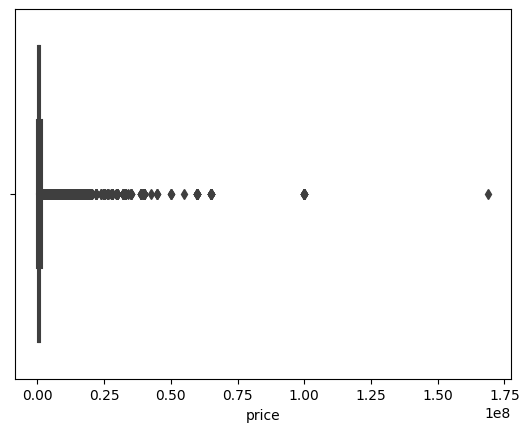

In [214]:
sns.boxplot(data = df , x = 'price')

<Axes: xlabel='house_size'>

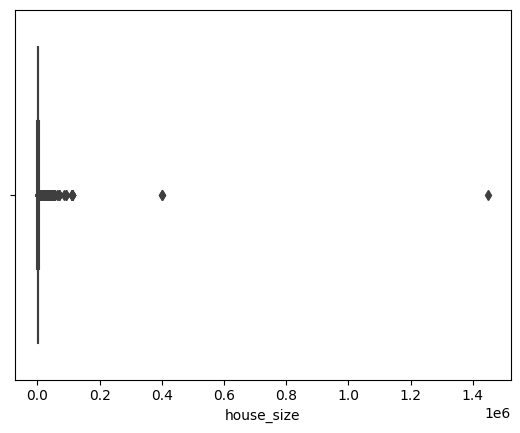

In [215]:
sns.boxplot(data = df , x = 'house_size')

<Axes: xlabel='acre_lot'>

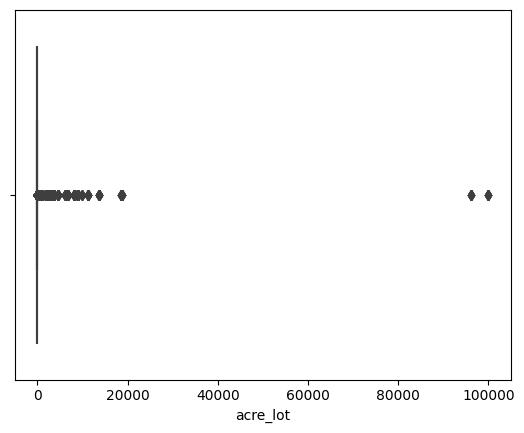

In [216]:
sns.boxplot( data = df , x= 'acre_lot')

<Axes: xlabel='bath'>

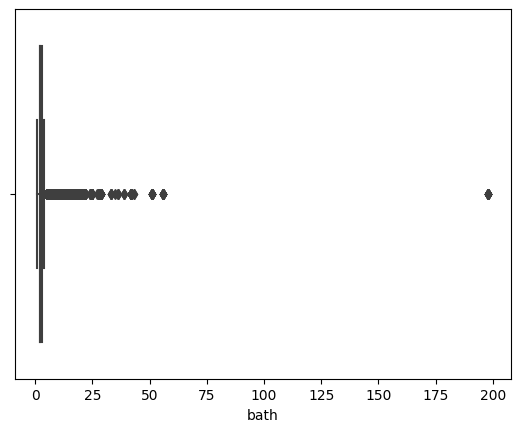

In [217]:
sns.boxplot( data = df , x= 'bath')

<Axes: xlabel='bed'>

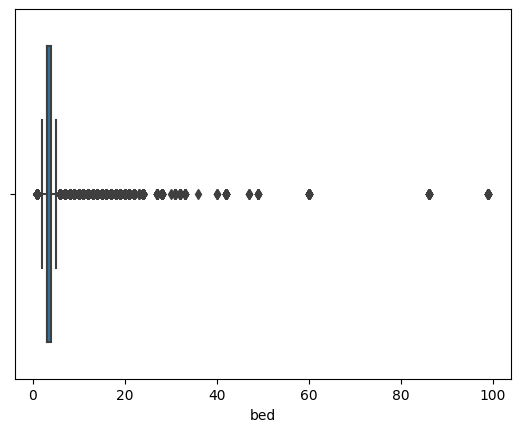

In [218]:
sns.boxplot( data = df , x= 'bed')

In [219]:
df.describe()

,bed,bath,acre_lot,house_size,price
count,468606.000000,468606.000000,468606.000000,4.686060e+05,4.686060e+05
mean,3.809973,2.740844,8.775754,2.457712e+03,8.109666e+05
std,2.130687,2.213465,601.442041,3.301055e+03,1.565586e+06
min,1.000000,1.000000,0.000000,1.040000e+02,5.000000e+02
25%,3.000000,2.000000,0.110000,1.344000e+03,2.949000e+05
50%,3.000000,2.000000,0.270000,1.919000e+03,4.790000e+05
75%,4.000000,3.000000,0.920000,2.817000e+03,7.990000e+05
max,99.000000,198.000000,100000.000000,1.450112e+06,1.690000e+08


In [220]:
def detect_outliers(data, field):
    Q1 = data[field].quantile(0.25)
    Q3 = data[field].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound , upper_bound

In [221]:
outliers = detect_outliers(df, 'price')
print(outliers)

(-461250.0, 1555150.0)


In [222]:
outliers = detect_outliers(df, 'house_size')
print(outliers)

(-865.5, 5026.5)


In [223]:
outliers = detect_outliers(df, 'acre_lot')
print(outliers)

(-1.105, 2.1350000000000002)


In [224]:
outliers = detect_outliers(df, 'bath')
print(outliers)

(0.5, 4.5)


In [225]:
outliers = detect_outliers(df, 'bed')
print(outliers)

(1.5, 5.5)


In [226]:
df = df[(df['price'] <= 1555150 ) & (df['house_size'] <=5026.5) & (df['acre_lot'] <=2.2) & (df['bath'] <=5) & (df['bed'] <=6)]

In [227]:
df.shape

(354619, 6)

<Axes: xlabel='price'>

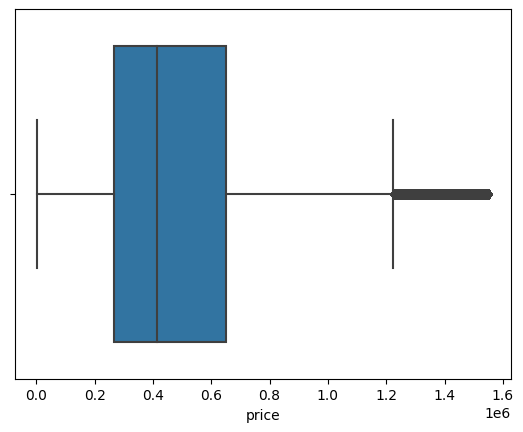

In [228]:
sns.boxplot(data = df , x='price')

<Axes: xlabel='price', ylabel='Count'>

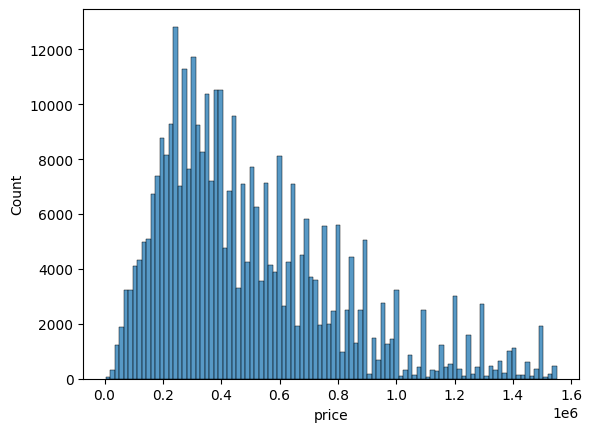

In [229]:
sns.histplot(df['price'] , bins= 100 )

<Axes: xlabel='house_size'>

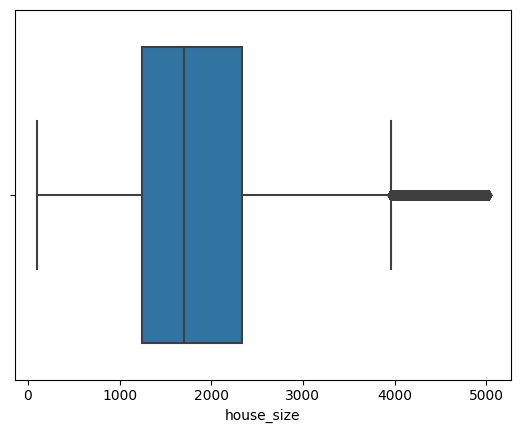

In [230]:
sns.boxplot(data = df , x='house_size')

<Axes: xlabel='acre_lot'>

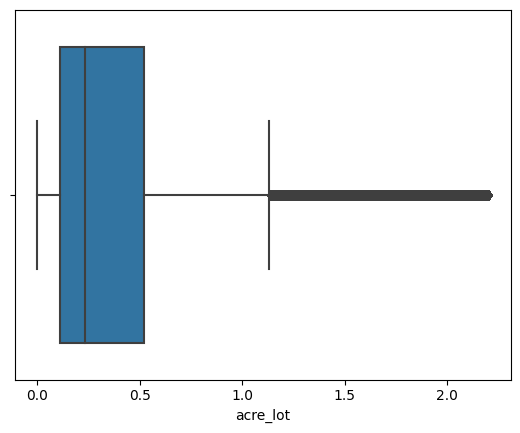

In [231]:
sns.boxplot(data = df , x='acre_lot')

<Axes: xlabel='acre_lot', ylabel='Count'>

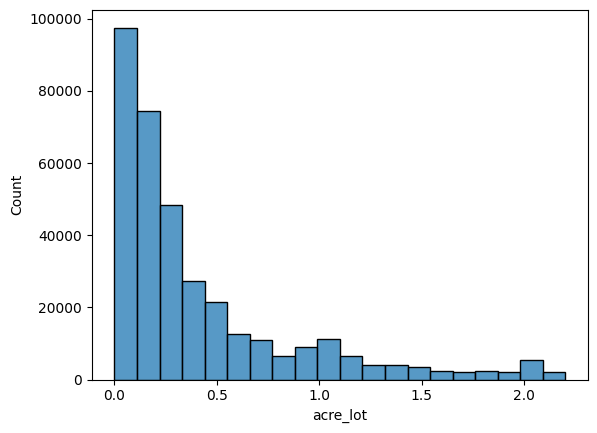

In [232]:
sns.histplot(df['acre_lot'] , bins= 20 )

<Axes: xlabel='house_size', ylabel='Count'>

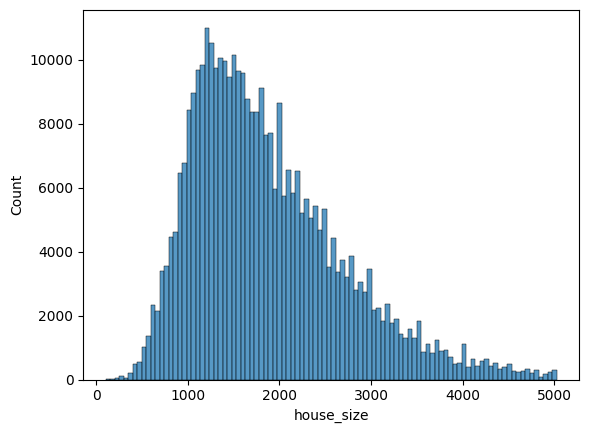

In [233]:
sns.histplot(df['house_size'] , bins= 100 )

<Axes: xlabel='bed'>

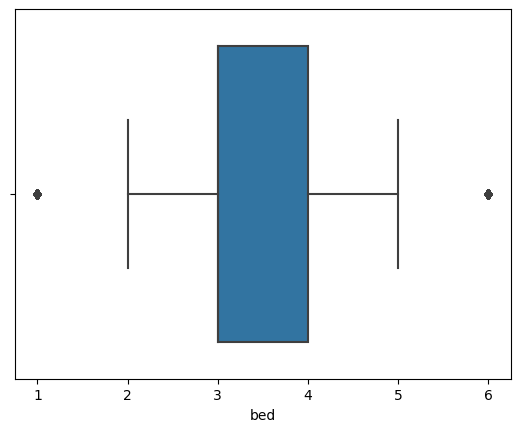

In [234]:
sns.boxplot(data = df , x='bed')

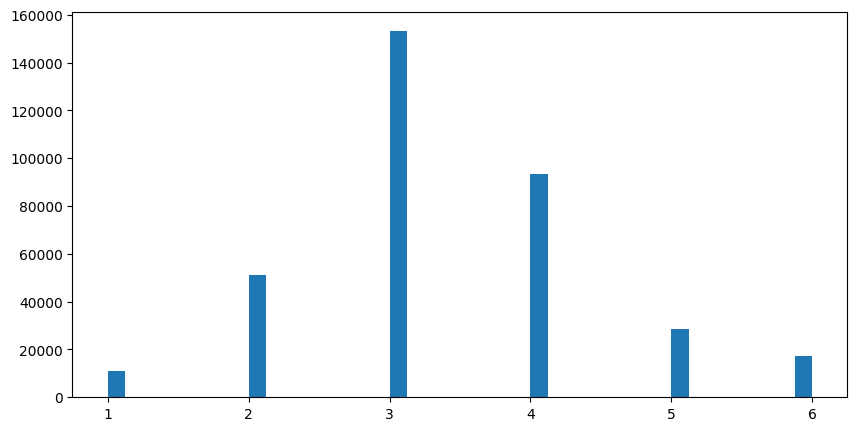

In [235]:
ax = plt.figure(figsize= (10,5))
plt.hist(x= df['bed'], bins=40)
plt.show()

In [236]:
df['state'].unique()

array(['Puerto Rico', 'Virgin Islands', 'Massachusetts', 'Connecticut',
       'New Jersey', 'New Hampshire', 'Vermont', 'New York',
       'Rhode Island', 'Maine', 'Pennsylvania', 'Delaware'], dtype=object)

In [237]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['state_numeric'] = label_encoder.fit_transform(df['state'])
df = df.drop("state", axis=1)
df

,bed,bath,acre_lot,house_size,price,state_numeric
0,3.0,2.0,0.12,920.0,105000.0,8
1,4.0,2.0,0.08,1527.0,80000.0,8
2,2.0,1.0,0.15,748.0,67000.0,8
3,4.0,2.0,0.10,1800.0,145000.0,8
5,4.0,3.0,0.46,2520.0,179000.0,8
...,...,...,...,...,...,...
1004958,2.0,2.0,0.05,1337.0,505000.0,6
1004959,2.0,1.0,0.14,730.0,332500.0,6
1004960,3.0,2.0,0.11,1578.0,699000.0,6
1004962,3.0,2.0,0.14,1806.0,599000.0,6


In [238]:
numeric_to_state = {label: state for label, state in enumerate(label_encoder.classes_)}
# Print the mapping
print(numeric_to_state)

{0: 'Connecticut', 1: 'Delaware', 2: 'Maine', 3: 'Massachusetts', 4: 'New Hampshire', 5: 'New Jersey', 6: 'New York', 7: 'Pennsylvania', 8: 'Puerto Rico', 9: 'Rhode Island', 10: 'Vermont', 11: 'Virgin Islands'}


In [239]:
df.columns

Index(['bed', 'bath', 'acre_lot', 'house_size', 'price', 'state_numeric'], dtype='object')

In [240]:
from sklearn.preprocessing import  MinMaxScaler, OneHotEncoder,StandardScaler

In [242]:
scaler = MinMaxScaler()
df[['bed', 'bath','house_size','price','acre_lot']] = scaler.fit_transform(df[['bed', 'bath','house_size','price','acre_lot']])

In [243]:
df_encoded = pd.get_dummies(df, columns=['state_numeric'])

In [244]:
df_encoded

,bed,bath,acre_lot,house_size,price,state_numeric_0,state_numeric_1,state_numeric_2,state_numeric_3,state_numeric_4,state_numeric_5,state_numeric_6,state_numeric_7,state_numeric_8,state_numeric_9,state_numeric_10,state_numeric_11
0,0.4,0.25,0.054545,0.165887,0.065390,0,0,0,0,0,0,0,0,1,0,0,0
1,0.6,0.25,0.036364,0.289286,0.049221,0,0,0,0,0,0,0,0,1,0,0,0
2,0.2,0.00,0.068182,0.130921,0.040812,0,0,0,0,0,0,0,0,1,0,0,0
3,0.6,0.25,0.045455,0.344786,0.091262,0,0,0,0,0,0,0,0,1,0,0,0
5,0.6,0.50,0.209091,0.491157,0.113253,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004958,0.2,0.25,0.022727,0.250661,0.324106,0,0,0,0,0,0,1,0,0,0,0,0
1004959,0.2,0.00,0.063636,0.127262,0.212535,0,0,0,0,0,0,1,0,0,0,0,0
1004960,0.4,0.25,0.050000,0.299654,0.449583,0,0,0,0,0,0,1,0,0,0,0,0
1004962,0.4,0.25,0.063636,0.346005,0.384904,0,0,0,0,0,0,1,0,0,0,0,0


In [245]:
df= df_encoded.copy()

In [246]:
X = df.drop('price', axis=1)
y = df['price']

In [247]:
from sklearn.model_selection import train_test_split

In [248]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2)

In [249]:
from sklearn.linear_model import LinearRegression

In [250]:
reg = LinearRegression()

In [251]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [252]:
reg.score(xtest,ytest)

0.4659997500369436

In [253]:
reg.coef_

array([-0.06402283,  0.25885071, -0.01101543,  0.34475027, -0.04061264,
       -0.08493323, -0.02104325,  0.11554433,  0.00899825, -0.00685687,
        0.16268271, -0.04602419, -0.11348517,  0.00546584, -0.06453811,
        0.08480232])